# Assignment 1: Build the flow around a NACA0012 airfoil

In [1]:
import math
import numpy
from matplotlib import pyplot
# embed figures into the notebook
%matplotlib inline

In [2]:
N = 51                                # Number of points in each direction
x_start, x_end = -1.0, 2.0            # x-direction boundaries
y_start, y_end = -0.5, 0.5            # y-direction boundaries
x = numpy.linspace(x_start,x_end,N)    # 1D-array for x
y = numpy.linspace(y_start,y_end,N)    # 1D-array for y
X, Y = numpy.meshgrid(x, y)              # generates a mesh grid

In [3]:
x_source=numpy.loadtxt('../AeroPython/lessons/resources/NACA0012_x.txt')
y_source=numpy.loadtxt('../AeroPython/lessons/resources/NACA0012_y.txt')
sigma_source=numpy.loadtxt('../AeroPython/lessons/resources/NACA0012_sigma.txt')

In [4]:
numpy.shape(x_source)

(100,)

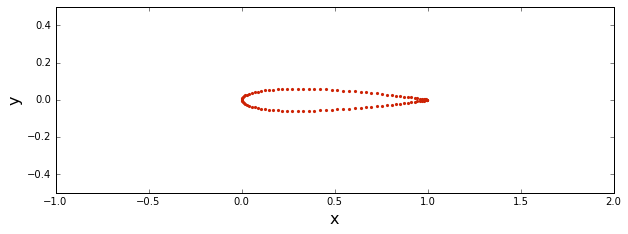

In [5]:
# plot the grid of points
size = 10
pyplot.figure(figsize=(size, (y_end-y_start)/(x_end-x_start)*size))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.scatter(x_source, y_source, s=10, color='#CD2305', marker='o', linewidth=0)

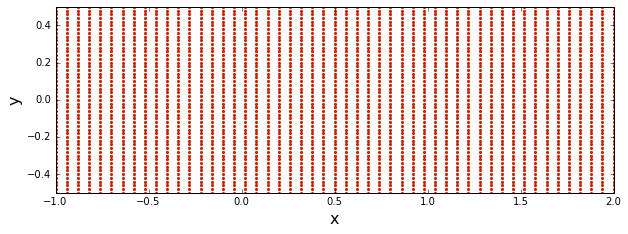

In [6]:
size = 10
pyplot.figure(figsize=(size, (y_end-y_start)/(x_end-x_start)*size))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.scatter(X, Y, s=10, color='#CD2305', marker='o', linewidth=0)

In [7]:
u_inf = 1.0        # freestream speed

# compute the freestream velocity field
u_freestream = u_inf * numpy.ones((N, N), dtype=float)
v_freestream = numpy.zeros((N, N), dtype=float)

# compute the stream-function
psi_freestream = u_inf * Y

In [8]:
def get_velocity(strength, xs, ys, X, Y):
    """
    Returns the velocity field generated by a source/sink.
    
    Parameters
    ----------
    strength: float
        Strength of the source/sink.
    xs: float
        x-coordinate of the source (or sink).
    ys: float
        y-coordinate of the source (or sink).
    X: 2D Numpy array of floats
        x-coordinate of the mesh points.
    Y: 2D Numpy array of floats
        y-coordinate of the mesh points.
    
    Returns
    -------
    u: 2D Numpy array of floats
        x-component of the velocity vector field.
    v: 2D Numpy array of floats
        y-component of the velocity vector field.
    """
    u = strength/(2*numpy.pi)*(X-xs)/((X-xs)**2+(Y-ys)**2)
    v = strength/(2*numpy.pi)*(Y-ys)/((X-xs)**2+(Y-ys)**2)
    
    return u, v

In [9]:
def get_stream_function(strength, xs, ys, X, Y):
    """
    Returns the stream-function generated by a source/sink.
    
    Parameters
    ----------
    strength: float
        Strength of the source/sink.
    xs: float
        x-coordinate of the source (or sink).
    ys: float
        y-coordinate of the source (or sink).
    X: 2D Numpy array of floats
        x-coordinate of the mesh points.
    Y: 2D Numpy array of floats
        y-coordinate of the mesh points.
    
    Returns
    -------
    psi: 2D Numpy array of floats
        The stream-function.
    """
    psi = strength/(2*numpy.pi)*numpy.arctan2((Y-ys), (X-xs))
    
    return psi

In [10]:
u_1, v_1=0,0
psi_1=0
for i in range(len(x_source)):
    u_source, v_source = get_velocity(sigma_source[i], x_source[i], y_source[i], X, Y)
    psi_source = get_stream_function(sigma_source[i], x_source[i], y_source[i], X, Y)
    u_1=u_source+u_1
    v_1=v_source+v_1
    psi_1=psi_source+psi_1

In [11]:
numpy.shape(u_source)

(51, 51)

In [12]:
numpy.shape(u_1)

(51, 51)

In [13]:
# superposition of the source on the freestream
u = u_freestream + u_1
v = v_freestream + v_1
psi = psi_freestream + psi_1

# Stream lines in the domain and the profile of NACA0012 airfoil in one plot

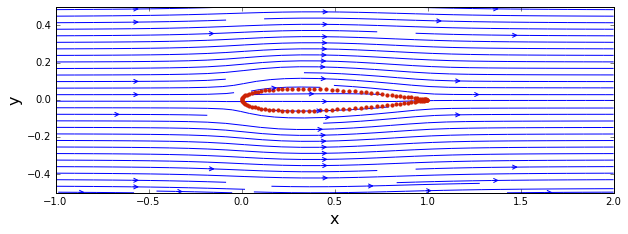

In [14]:
size = 10
pyplot.figure(figsize=(size, (y_end-y_start)/(x_end-x_start)*size))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.streamplot(X, Y, u, v, density=1, linewidth=1, arrowsize=1, arrowstyle='->')
pyplot.scatter(x_source, y_source, color='#CD2305', s=10, marker='o')

# Distribution of the pressure coefficient and a single marker on the location of the maximum pressure

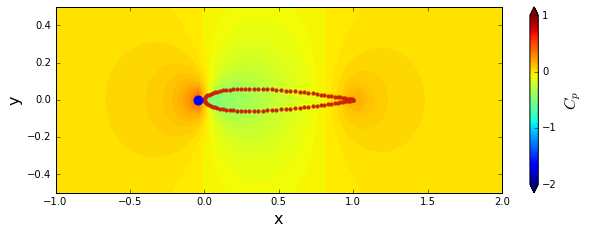

In [15]:
# compute the pressure coefficient field
cp = 1.0 - (u**2+v**2)/u_inf**2

# plot the pressure coefficient field
size = 10
pyplot.figure(figsize=(size, (y_end-y_start)/(x_end-x_start)*size))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
contf = pyplot.contourf(X, Y, cp, levels=numpy.linspace(-2, 1, 100), extend='both')
cbar = pyplot.colorbar(contf)
cbar.set_label('$C_p$', fontsize=16)
cbar.set_ticks([-2, -1.0, 0.0, 1.0])
pyplot.scatter(x_source, y_source, color='#CD2305', s=10, marker='o')
pyplot.scatter(X[1][numpy.argmax(cp)%N], Y[numpy.argmax(cp)//N][1], color='b', s=80, marker='o')

In [16]:
numpy.argmax(cp)//N

25

In [17]:
numpy.argmax(cp)%N

16

In [18]:
cp

array([[ 0.01079599,  0.01133045,  0.01186118, ...,  0.00961254,
         0.00913407,  0.00867186],
       [ 0.01115424,  0.01174522,  0.01234275, ...,  0.0099216 ,
         0.00940245,  0.00890569],
       [ 0.01151041,  0.01215898,  0.01282506, ...,  0.01022856,
         0.00966822,  0.00913663],
       ..., 
       [ 0.01151041,  0.01215898,  0.01282506, ...,  0.01022856,
         0.00966822,  0.00913663],
       [ 0.01115424,  0.01174522,  0.01234275, ...,  0.0099216 ,
         0.00940245,  0.00890569],
       [ 0.01079599,  0.01133045,  0.01186118, ...,  0.00961254,
         0.00913407,  0.00867186]])

In [19]:
numpy.shape(cp)

(51, 51)